Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
from scipy.interpolate import interp1d

Reading Dataset


In [41]:
dfo = pd.read_csv("MNIST.csv")
data = pd.read_csv("Manaus.csv")

In [ ]:
dfo.info()
dfo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13533 entries, 0 to 13532
Columns: 1025 entries, label to FP1-1023
dtypes: int64(1025)
memory usage: 105.8 MB


label       0
FP1-0       0
FP1-1       0
FP1-2       0
FP1-3       0
           ..
FP1-1019    0
FP1-1020    0
FP1-1021    0
FP1-1022    0
FP1-1023    0
Length: 1025, dtype: int64

Standardization

In [ ]:
scaler = StandardScaler()
standardized_values = scaler.fit_transform(dfo)
df = pd.DataFrame(standardized_values, columns=dfo.columns)

Removing outliers

In [ ]:
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1)
df = df[filtered_entries]

Checking the heatmap using covariance matrix

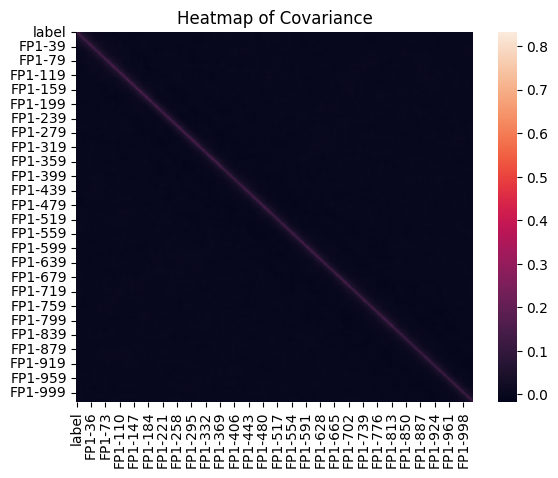

In [41]:
# Calculate covariance matrix
covariance = df.cov()

# Create a heatmap with seaborn
sns.heatmap(covariance)

# Add title
plt.title("Heatmap of Covariance")

# Show the plot
plt.show()

Plotting the correlation heatmap


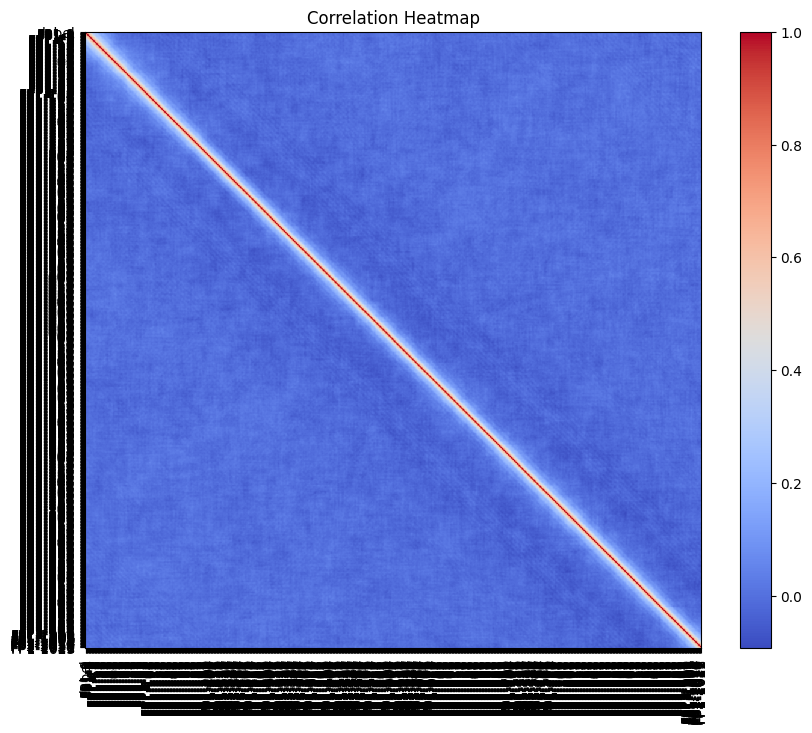

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

Interpolating and plotting 5 graphs together

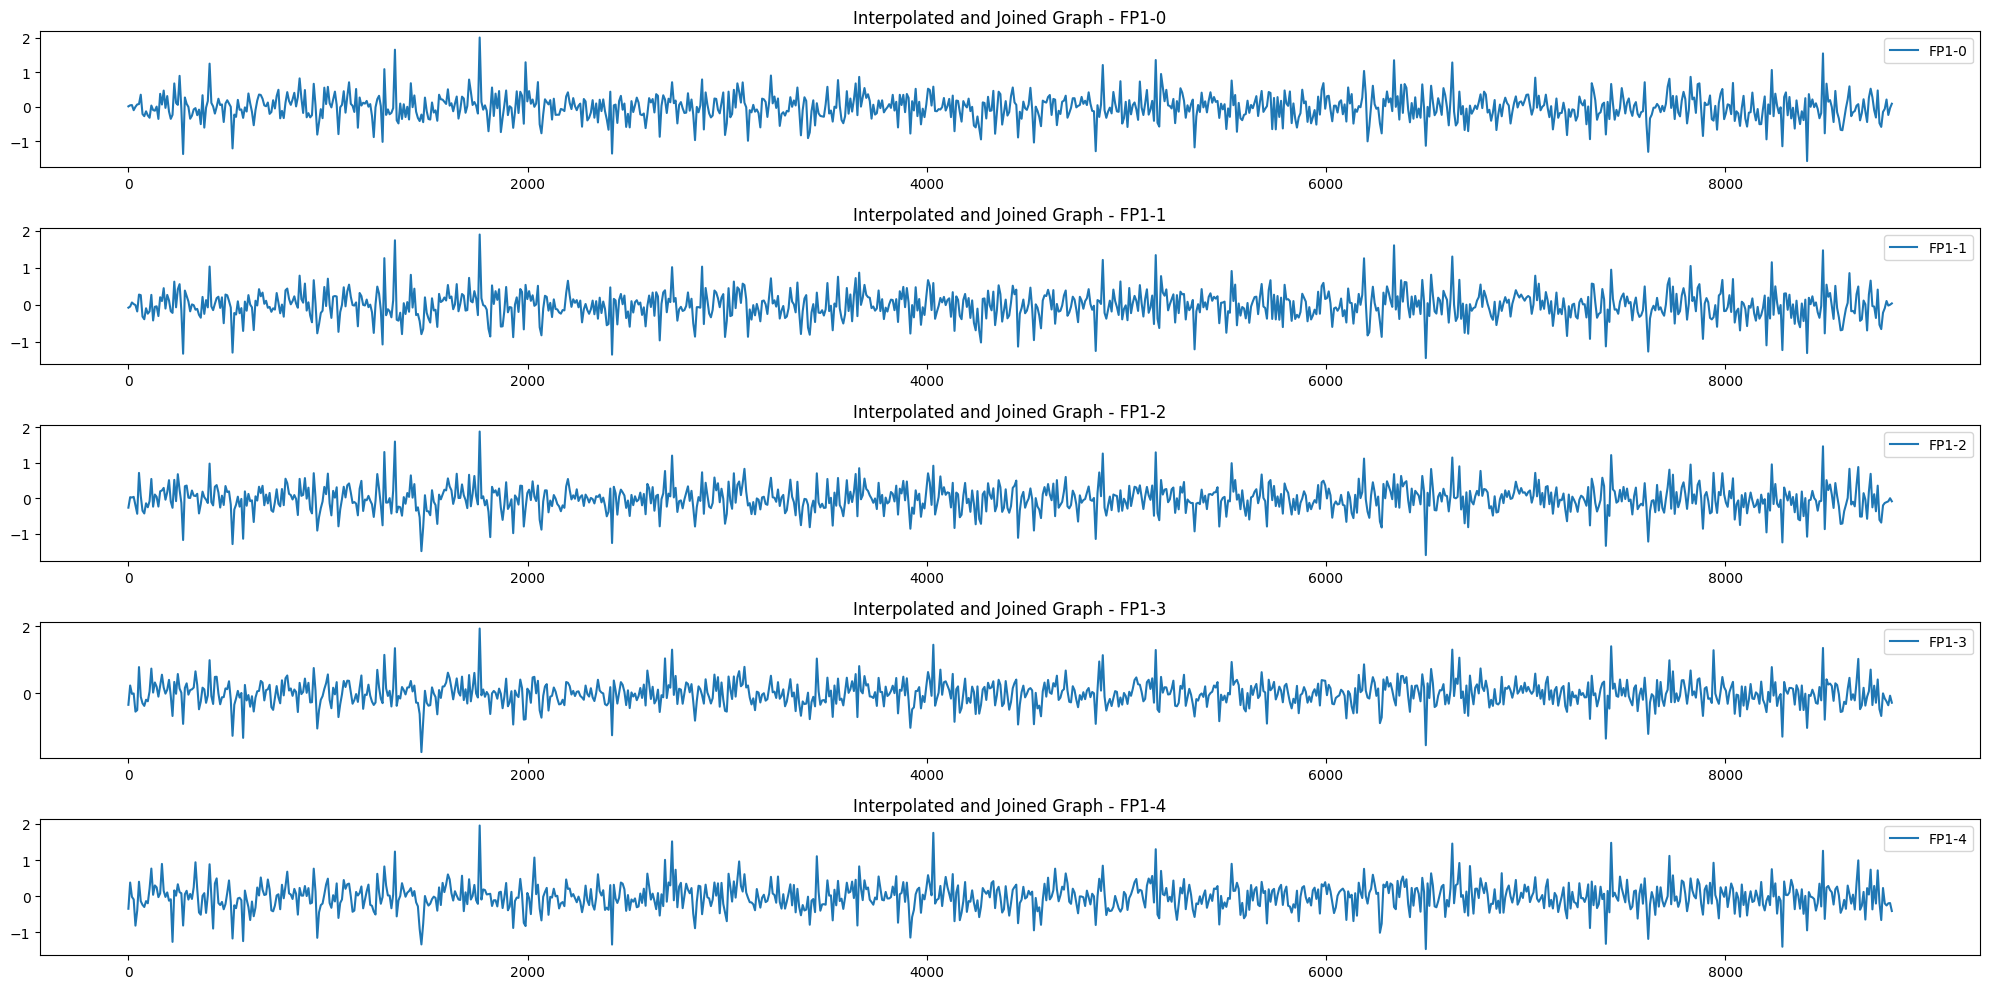

In [59]:
fig, axs = plt.subplots(5, 1, figsize=(20, 10))

# Interpolate and plot each column in separate subplots
for x in range(1,6):
    x_data = np.arange(len(df))
    y_data = df[df.columns[x]]

    # Interpolate the data
    f = interp1d(x_data, y_data, kind='cubic')
    x_interp = np.linspace(x_data.min(), x_data.max(), 1000)
    y_interp = f(x_interp)

    # Plot the interpolated data in the respective subplot
    axs[x-1].plot(x_interp, y_interp, label=df.columns[x])
    axs[x-1].set_title('Interpolated and Joined Graph - ' + df.columns[x])
    axs[x-1].legend()

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

In [42]:
data.head()

,index,Data,Hora,"PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/mÂ²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)",TEMPERATURA DO PONTO DE ORVALHO (Â°C),...,"VENTO, DIREÃ‡ÃƒO HORARIA (gr) (Â° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,09-05-2000,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,09-05-2000,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,09-05-2000,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,09-05-2000,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,09-05-2000,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


In [43]:
data.replace(-9999, pd.NA, inplace=True)
data.isnull().sum()

index                                                        0
Data                                                         0
Hora                                                         0
PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)                      12437
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    12450
PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)         12937
PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)        12937
RADIACAO GLOBAL (Kj/mÂ²)                                 21451
TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)            12437
TEMPERATURA DO PONTO DE ORVALHO (Â°C)                    12525
TEMPERATURA MÃXIMA NA HORA ANT. (AUT) (Â°C)             12932
TEMPERATURA MÃNIMA NA HORA ANT. (AUT) (Â°C)             12932
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Â°C)        13021
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Â°C)        13021
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 13020
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               

Imputing missing values using mean


In [44]:
cols_to_impute = data.columns[3:20]

# Calculate the mean for those columns
mean_values = data[cols_to_impute].mean()

# Replace missing values with the mean of each column
data[cols_to_impute] = data[cols_to_impute].fillna(mean_values)
data.isnull().sum()
data.head()

,index,Data,Hora,"PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/mÂ²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)",TEMPERATURA DO PONTO DE ORVALHO (Â°C),...,"VENTO, DIREÃ‡ÃƒO HORARIA (gr) (Â° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,09-05-2000,00:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,09-05-2000,01:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,09-05-2000,02:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,09-05-2000,03:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,09-05-2000,04:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


Because the region state, station, station_code, latitude, longitude, height is same for all the rows we drop them
and convert the date and hour columns into integers

In [45]:
def hour_to_number(hour_str):
    hour, minute = map(int, hour_str.split(':'))
    return hour + minute / 60
def date_to_number(date_str):
    day, month, year = map(int, date_str.split('-'))
    return year *365 + month *12 + day

data['Data'] = data['Data'].apply(date_to_number)
data['Hora'] = data['Hora'].apply(hour_to_number)
drop_list = ["index", "region", "state", "station", "station_code", "latitude", "longitude", "height"]
data.drop(drop_list, axis=1, inplace=True)

In [47]:
z_scores = stats.zscore(data)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1)
dataa = data[filtered_entries]

In [48]:
scaler = StandardScaler()
standardized_values = scaler.fit_transform(dataa)
dat = pd.DataFrame(standardized_values, columns=data.columns)
dat.head()

,Data,Hora,"PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/mÂ²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)",TEMPERATURA DO PONTO DE ORVALHO (Â°C),TEMPERATURA MÃXIMA NA HORA ANT. (AUT) (Â°C),TEMPERATURA MÃNIMA NA HORA ANT. (AUT) (Â°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Â°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Â°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÃ‡ÃƒO HORARIA (gr) (Â° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,-1.651452,-1.658448,0.172429,0.010606,0.011092,0.01008,-0.006347,-0.012298,-0.026075,-0.007921,-0.01216,-0.021296,-0.02656,0.004292,0.001288,0.004853,0.003481,0.127978,0.009065
1,-1.651452,-1.513987,0.172429,0.010606,0.011092,0.01008,-0.006347,-0.012298,-0.026075,-0.007921,-0.01216,-0.021296,-0.02656,0.004292,0.001288,0.004853,0.003481,0.127978,0.009065
2,-1.651452,-1.369525,0.172429,0.010606,0.011092,0.01008,-0.006347,-0.012298,-0.026075,-0.007921,-0.01216,-0.021296,-0.02656,0.004292,0.001288,0.004853,0.003481,0.127978,0.009065
3,-1.651452,-1.225064,0.172429,0.010606,0.011092,0.01008,-0.006347,-0.012298,-0.026075,-0.007921,-0.01216,-0.021296,-0.02656,0.004292,0.001288,0.004853,0.003481,0.127978,0.009065
4,-1.651452,-1.080602,0.172429,0.010606,0.011092,0.01008,-0.006347,-0.012298,-0.026075,-0.007921,-0.01216,-0.021296,-0.02656,0.004292,0.001288,0.004853,0.003481,0.127978,0.009065
